## 2. Breast Cancer dataset Visualization
####  Visualization of the dataset and statistical analysis

To get a better idea of the different feature values and their distribuation before feeding the data to a machine learning algorithm.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from matplotlib import pyplot as plt

# loading the data and drop the id column
data = pd.read_csv('data.csv')
data.drop('id', axis =1, inplace=True)

### Summary statistics about

In [2]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Skewness:  Symmetry or asymmetry in the distribution of data

As can be seen below, several features are highly positively skewed. 



For more information about skew: https://brownmath.com/stat/shape.htm

In [3]:
data.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

###  Diagnosis (label column) categorical data - numeric

* 357 samples are benign while 212 are cancerous 

* M = 1 (Cancerous)
* B = 0 (Benign)

In [4]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [5]:
# how many instances in each class

freq = data.groupby('diagnosis', axis=0)
pd.DataFrame(freq.size(), columns=['No of samples'])

,No of samples
diagnosis,
B,357
M,212


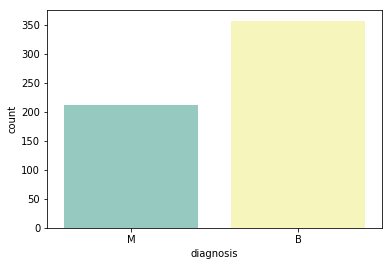

In [6]:
# plotting frequency of cancer diagnosis
sns.set_context({"figure.figsize": (6, 4)})
sns.countplot(data['diagnosis'], label = 'Count', palette = "Set3")

##  Features Examination 
* Which Features are most helpful in classifying the samples?
* Are there any general trends that may help in model and hyper parameter selection?
* It's useful to group the data with respect to their suffix (mean, se, worst)
* Earlier the ID column was deleted since its redundant, now its useful to use it with histrograms 

## Histograms

In [7]:
#Join the 'ID' and 'Diagnosis' back on
data_id_diag=data.reindex(["id","diagnosis"])
data_diag=data.reindex(["diagnosis"])

# first 10 features are "mean" features / slicing 
data_mean=data.iloc[:,1:11] 
#data_se=data.iloc[:,11:22]
#data_worst=data.iloc[:,23:]

print(data_mean.columns)
#print(data_se.columns)
#print(data_worst.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


###  Features ending with (_mean) 

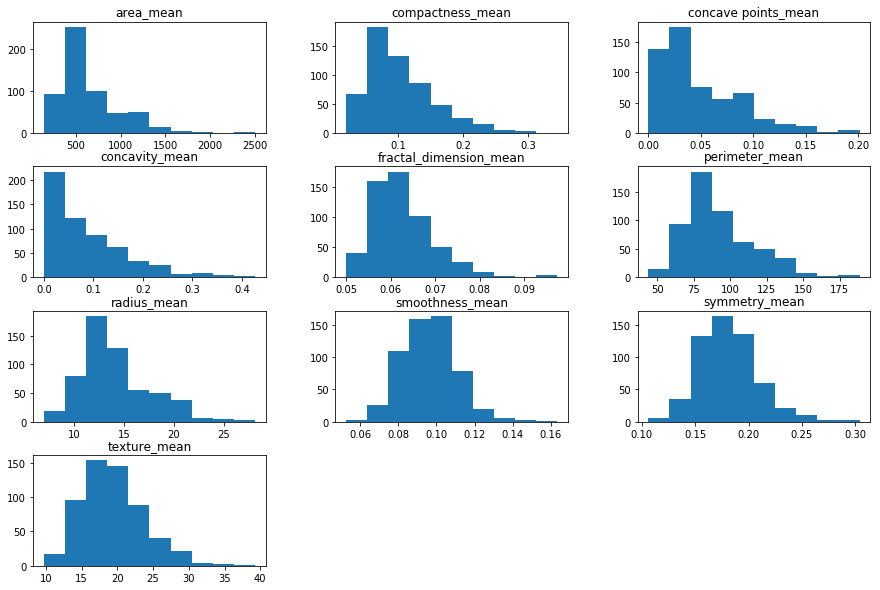

In [8]:
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

### Features ending with (_se)

In [9]:
# features from 11 to 22 are _se  
data_se=data.iloc[:,11:22]
print(data_se.columns)

Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst'],
      dtype='object')


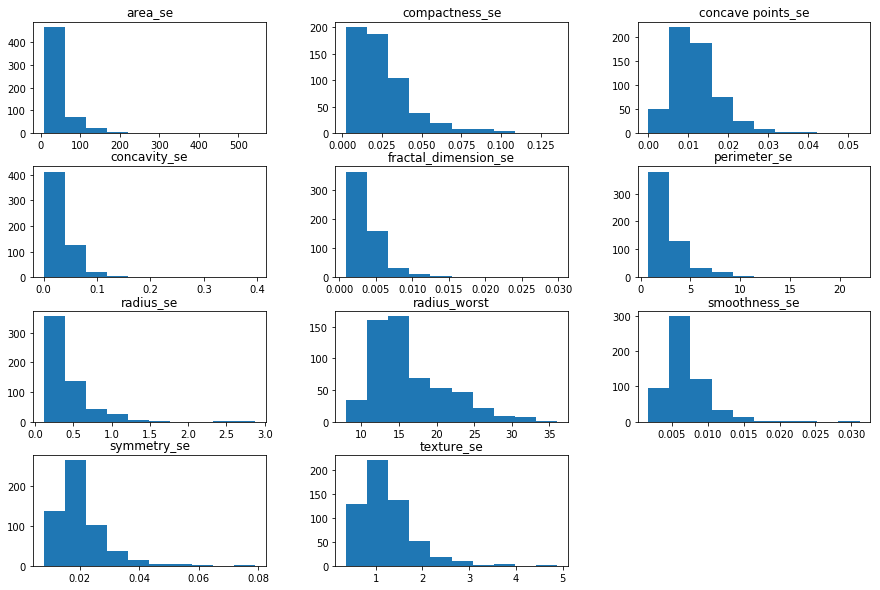

In [10]:
hist_mean=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

### Features ending with (_worst)


In [11]:
data_worst=data.iloc[:,23:]
print(data_worst.columns)

Index(['perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


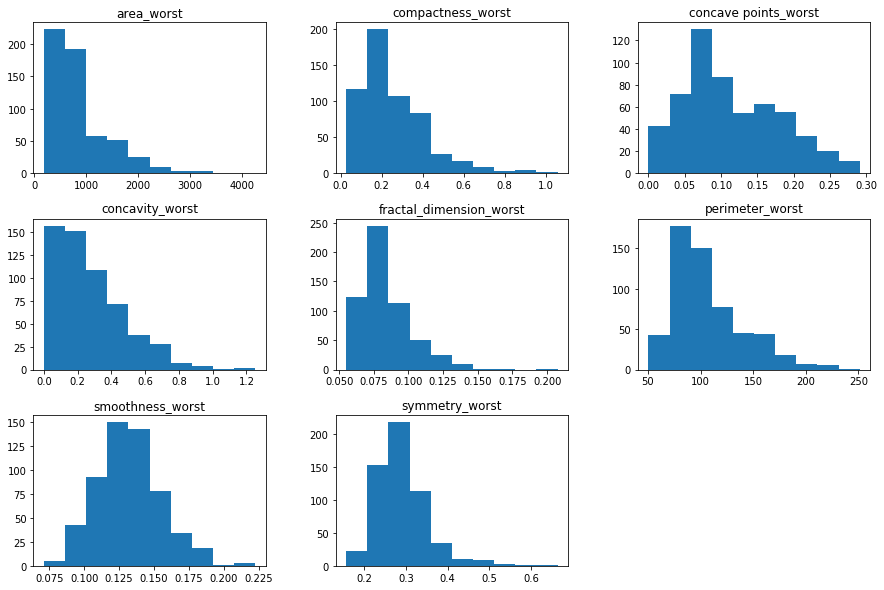

In [12]:
hist_mean=data_worst.hist(bins=10, figsize=(15, 10),grid=False)

### By examining the above histograms, we notice that: 

* concavity has expononetial distribuation 
* concave points is close to an exponential distribuation 
* Texture, smoothness and symmetry seems to have a bell curve distribution 

One aspect related to the "Central limit theorem" is that many machine learning algorithms assume the input data has a gaussian distribution. The link below addresses this aspect with more details

https://stackoverflow.com/questions/12616406/anyone-can-tell-me-why-we-always-use-the-gaussian-distribution-in-machine-learni


## Density plots

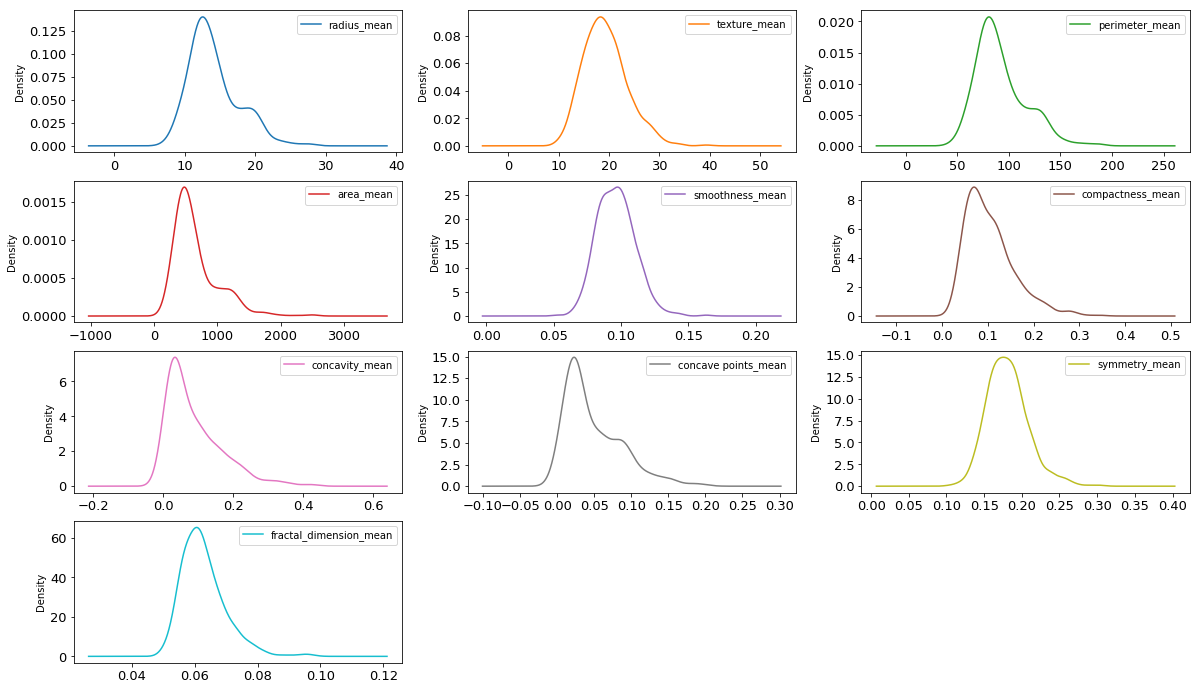

In [13]:
# "_Mean" features
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False, fontsize=13, figsize=(20,12))


# "_se" features
#plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
#                     sharey=False,fontsize=12, figsize=(15,10))

# "_worst" features

#plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
#                     figsize=(15,10))

### By examining the above plots, we notice: 

* Perimeter, radius, area, concavity, compactness have (roughly) an Exponential distribution 
* Texture, smooth and symmetry features may have a bell curve distrubution (roughly)


## Correlation Matrix


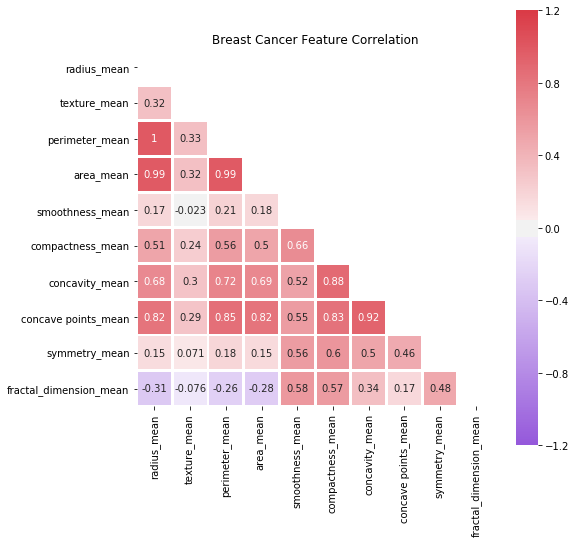

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(280, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square',center=0,vmin=-1.2, cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

### By examining the above plots, we notice: 
####  strong positive correlation:
* Mean area with radius and perimeter (0.99)
* Concavity mean with compactness mean ... 
* Moderate correlation and and strong negative correlations can be spotted as well

## Pairplots


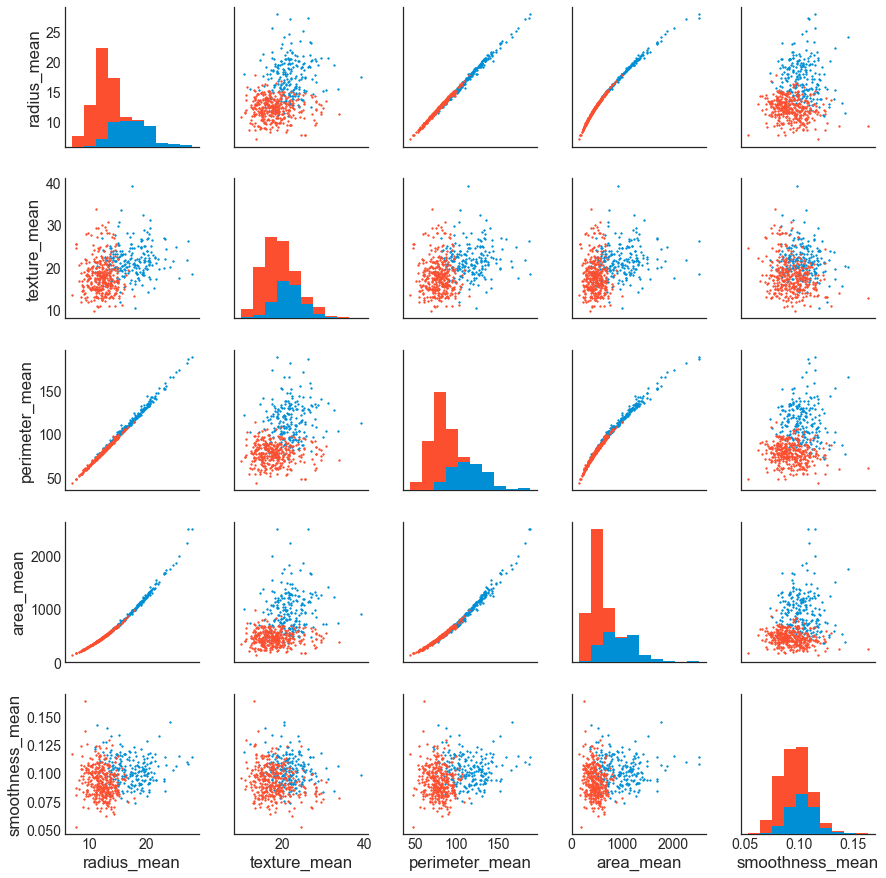

In [19]:
data = pd.read_csv('data.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]], hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

### By examinging the above pairplot:
* One can notice directly that there are excellent features for seperating the two classes, such as radius, perimeter, area, compactness, concavity. Hence, a given classification model is highly likely to perform well using these features
* Other features doesn't seem to show distinction between the two classes (M,B) such as texture, smoothness, symmetry 
* Histograms are not showing signs of outliers 